<a href="https://colab.research.google.com/github/Mitchell-Odili/Breast-Cancer-Wisconsin-Diagnostic-Dataset/blob/main/breast_cancer_wisconsin_diagnostics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('breast-cancer-wisconsin-diagnostics')
jovian.set_colab_id('1AB6fE66hhMsqUn3re8HWcpbYj5znHo1E')

### Breast Cancer Wisconsin Diagnostic Dataset 

Predict whether the cancer is benign or malignant

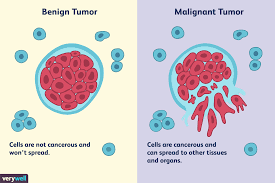

### Description

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

We will use Logistic classification for this Classification problem

### Logistic Regression for Solving Classification Problems

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">


The output of the sigmoid function is called a logistic, hence the name _logistic regression_. For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.

### Machine Learning Workflow

Whether we're solving a regression problem using linear regression or a classification problem using logistic regression, the workflow for training a model is exactly the same:

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">


Classification and regression are both supervised machine learning problems, because they use labeled data. Machine learning applied to unlabeled data is known as unsupervised learning ([image source](https://au.mathworks.com/help/stats/machine-learning-in-matlab.html)). 

<img src="https://i.imgur.com/1EMQmAw.png" width="480">


In this tutorial, we'll train a _logistic regression_ model using the Breast Cancer Wisconsin dataset to predict whether a cancer is benign or malignant. This is a _binary classification_ problem.

Let's install the `scikit-learn` library which we'll use to train our model and `jovian` to save our work.

In [ ]:
!pip install jovian scikit-learn --upgrade --quiet

In [ ]:
import jovian

In [ ]:
jovian.commit(project = 'Breast-Cancer-Wisconsin-Diagnostics')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mitchell-odili/breast-cancer-wisconsin-diagnostics" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mitchell-odili/breast-cancer-wisconsin-diagnostics


'https://jovian.ai/mitchell-odili/breast-cancer-wisconsin-diagnostics'

## Downloading the Data

We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. Let's install and import `opendatasets`.

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
od.version()

'0.1.20'

The dataset can now be downloaded using `od.download`. When you execute `od.download`, you will be asked to provide your Kaggle username and API key. Follow these instructions to create an API key: http://bit.ly/kaggle-creds

In [ ]:
dataset_url = 'https://www.kaggle.com/uciml/breast-cancer-wisconsin-data'

In [ ]:
od.download(dataset_url)

Skipping, found downloaded files in ".\breast-cancer-wisconsin-data" (use force=True to force download)


Once the above command is executed, the dataset is downloaded and extracted to the the directory `breast-cancer-wisconsin-data`.

In [ ]:
import os

In [ ]:
data_dir = './breast-cancer-wisconsin-data'

In [ ]:
os.listdir(data_dir)

['data.csv']

In [ ]:
train_csv = data_dir + '/data.csv'

Let's load the data from `data.csv` using Pandas.

In [ ]:
!pip install pandas --quiet

In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(train_csv)
raw_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


The dataset contains over 569 rows and 33 columns. The dataset contains numeric and categorical columns. Our objective is to create a model to predict the value in the column `diagnosis`.

Let's check the data types and missing values in the various columns.

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

While we should be able to fill in missing values for most columns, it might be a good idea to discard the column `Unnamed: 32` where there are no values. We will leave it out later

In [ ]:
raw_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. Follow these tutorials to learn how to use these libraries:

- https://jovian.ai/aakashns/python-matplotlib-data-visualization
- https://jovian.ai/aakashns/interactive-visualization-plotly
- https://jovian.ai/aakashns/dataviz-cheatsheet

In [ ]:
!pip install plotly matplotlib seaborn --quiet

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Diagnosis

Let's look at the spread of the diagnosis i.e. the share of benign and malignant in our dataset

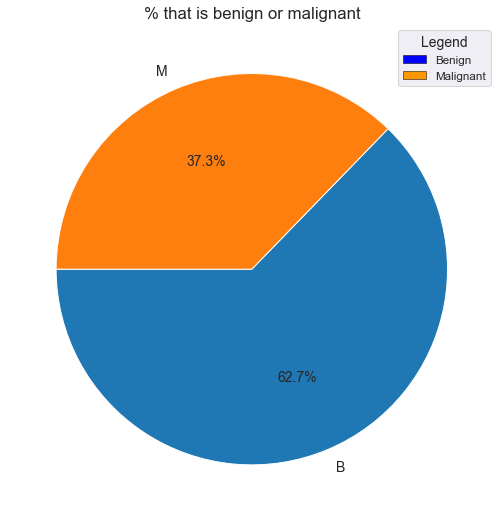

In [ ]:
plt.figure(figsize = (15,9))
plt.pie(raw_df.diagnosis.value_counts(),explode = (0.0, 0.0), 
        labels = raw_df.diagnosis.value_counts().index, autopct = '%1.1f%%', startangle= 180)
plt.title('% that is benign or malignant')

one = mpatches.Patch(facecolor='Blue', label='Benign', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#ff9700', label = 'Malignant', linewidth = 0.5, edgecolor = 'black')

plt.legend(handles = [one,two], title = 'Legend', loc = 1, fontsize = 'small');

Based off the plot, 62.7% of the observed tumours are "benign" (noncancerous) while 37.3% are "malignant" (cancerous)

Let's save our work before continuing.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mitchell-odili/breast-cancer-wisconsin-diagnostics" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mitchell-odili/breast-cancer-wisconsin-diagnostics


'https://jovian.ai/mitchell-odili/breast-cancer-wisconsin-diagnostics'

## (Optional) Working with a Sample

When working with massive datasets containing millions of rows, it's a good idea to work with a sample initially, to quickly set up your model training notebook. If you'd like to work with a sample, just set the value of `use_sample` to `True`.

In [ ]:
use_sample = False

In [ ]:
sample_fraction = 0.1

In [ ]:
if use_sample:
    raw_df = raw_df.sample(frac=sample_fraction).copy()

Make sure to set `use_sample` to `False` and re-run the notebook end-to-end once you're ready to use the entire dataset.

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
!pip install scikit-learn --upgrade --quiet

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val, test_df = train_test_split(raw_df, test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(train_val, test_size = 0.25, random_state = 42)

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (341, 33)
val_df.shape : (114, 33)
test_df.shape : (114, 33)


However, while working with dates, it's often a better idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

Let's save our work before continuing.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mitchell-odili/breast-cancer-wisconsin-diagnostics" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mitchell-odili/breast-cancer-wisconsin-diagnostics


'https://jovian.ai/mitchell-odili/breast-cancer-wisconsin-diagnostics'

### Identifying Input and Target Columns

Often, not all the columns in a dataset are useful for training a model. In the current dataset, we can ignore the `Id` column, to make a prediction about whether a tumour is benign or malignant.

Let's create a list of input columns, and also identify the target column.

In [ ]:
input_cols = list(train_df.columns)[2:-1]
target_col = 'diagnosis'

In [ ]:
print(input_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [ ]:
target_col

'diagnosis'

We can now create inputs and targets for the training, validation and test sets for further processing and model training.

In [ ]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

In [ ]:
train_inputs

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
217,10.200,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,0.1964,0.06315,...,11.48,24.47,75.40,403.7,0.09527,0.1397,0.19250,0.03571,0.2868,0.07809
283,16.240,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.09052,0.1876,0.06684,...,18.55,25.09,126.90,1031.0,0.13650,0.4706,0.50260,0.17320,0.2770,0.10630
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.71190,0.26540,0.4601,0.11890
504,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,0.09502,...,10.28,16.38,69.05,300.2,0.19020,0.3441,0.20990,0.10250,0.3038,0.12520
251,11.500,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,0.1834,0.05934,...,12.97,22.46,83.12,508.9,0.11830,0.1049,0.08105,0.06544,0.2740,0.06487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,14.710,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,0.06758,...,17.87,30.70,115.70,985.5,0.13680,0.4290,0.35870,0.18340,0.3698,0.10940
492,18.010,20.56,118.40,1007.0,0.10010,0.12890,0.11700,0.07762,0.2116,0.06077,...,21.53,26.06,143.40,1426.0,0.13090,0.2327,0.25440,0.14890,0.3251,0.07625
418,12.700,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.02402,0.1583,0.06275,...,13.65,16.92,88.12,566.9,0.13140,0.1607,0.09385,0.08224,0.2775,0.09464
385,14.600,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,0.05416,...,15.79,31.71,102.20,758.2,0.13120,0.1581,0.26750,0.13590,0.2477,0.06836


In [ ]:
train_target

217    B
283    M
0      M
504    B
251    B
      ..
57     M
492    M
418    B
385    M
325    B
Name: diagnosis, Length: 341, dtype: object

All columns are numerical. We could see from `raw_df.info()`. Alternatively, we could also identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training a logistic regression model.

In [ ]:
!pip install numpy --quiet

In [ ]:
import numpy as np

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

Let's view some statistics for the numeric columns

In [ ]:
train_inputs[numeric_cols].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,...,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,14.001481,19.128152,91.030762,642.609971,0.095934,0.102269,0.085459,0.047155,0.182006,0.062750,...,16.125613,25.465279,106.273167,866.555132,0.131554,0.248931,0.264040,0.112563,0.291753,0.083672
std,3.473378,4.197569,23.904744,345.479971,0.014450,0.053894,0.079140,0.038212,0.028181,0.007412,...,4.845435,5.977085,33.660162,578.566377,0.023416,0.157138,0.201125,0.066265,0.064154,0.018026
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,11.630000,16.320000,74.680000,412.600000,0.085820,0.061590,0.026380,0.019240,0.162000,0.057630,...,12.980000,21.180000,83.610000,513.900000,0.114000,0.138100,0.108700,0.062960,0.252500,0.070710
50%,13.200000,18.820000,85.480000,538.400000,0.094400,0.086420,0.057740,0.032500,0.179900,0.061660,...,14.910000,25.220000,97.170000,674.700000,0.130300,0.205700,0.215100,0.098610,0.284100,0.079610
75%,15.660000,21.560000,102.800000,758.600000,0.104900,0.129900,0.121800,0.067720,0.196600,0.066010,...,18.100000,29.410000,122.400000,1021.000000,0.146000,0.341600,0.375900,0.156500,0.317600,0.092060
max,27.420000,39.280000,186.900000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.274300,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,0.960800,0.291000,0.663800,0.173000


Do the ranges of the numeric columns seem reasonable? If not, we may have to do some data cleaning as well.

Let's also check the number of categories in each of the categorical columns.

In [ ]:
train_inputs[categorical_cols].nunique()

Series([], dtype: float64)

Let's save our work before continuing.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mitchell-odili/breast-cancer-wisconsin-diagnostics" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mitchell-odili/breast-cancer-wisconsin-diagnostics


'https://jovian.ai/mitchell-odili/breast-cancer-wisconsin-diagnostics'

## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

Let's use `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

First, we `fit` the scaler to the data i.e. compute the range of values for each numeric column.

In [ ]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

We can now inspect the minimum and maximum values in each column.

In [ ]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[6.981,
 9.71,
 43.79,
 143.5,
 0.05263,
 0.01938,
 0.0,
 0.0,
 0.106,
 0.04996,
 0.1115,
 0.3602,
 0.757,
 6.802,
 0.001713,
 0.002252,
 0.0,
 0.0,
 0.007882,
 0.0008948,
 7.93,
 12.02,
 50.41,
 185.2,
 0.07117,
 0.02729,
 0.0,
 0.0,
 0.1565,
 0.05504]

In [ ]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[28.11,
 39.28,
 188.5,
 2501.0,
 0.1634,
 0.3454,
 0.4268,
 0.2012,
 0.304,
 0.09744,
 2.873,
 4.885,
 21.98,
 542.2,
 0.03113,
 0.1354,
 0.396,
 0.05279,
 0.07895,
 0.02984,
 36.04,
 49.54,
 251.2,
 4254.0,
 0.2226,
 1.058,
 1.252,
 0.291,
 0.6638,
 0.2075]

We can now separately scale the training, validation and test sets using the `transform` method of `scaler`.

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

We can now verify that values in each column lie in the range $(0,1)$

In [ ]:
train_inputs[numeric_cols].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,...,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,0.332268,0.318504,0.326451,0.211712,0.390940,0.254246,0.200232,0.234369,0.383871,0.269382,...,0.291555,0.358350,0.278217,0.167458,0.398758,0.215037,0.210895,0.386814,0.266614,0.187798
std,0.164389,0.141954,0.165191,0.146545,0.130450,0.165308,0.185427,0.189919,0.142330,0.156107,...,0.172374,0.159304,0.167639,0.142196,0.154633,0.152456,0.160643,0.227713,0.126462,0.118234
min,0.033603,0.000000,0.028540,0.011410,0.000000,0.000000,0.000000,0.000000,0.054040,0.000000,...,0.026610,0.000000,0.020320,0.009438,0.066565,0.006821,0.000000,0.000000,0.000000,0.000000
25%,0.220029,0.223537,0.213461,0.114146,0.299630,0.129471,0.061809,0.095626,0.282828,0.161542,...,0.179651,0.244136,0.165347,0.080785,0.282837,0.107508,0.086821,0.216357,0.189237,0.102781
50%,0.294335,0.308083,0.288093,0.167508,0.377088,0.205632,0.135286,0.161531,0.373232,0.246420,...,0.248310,0.351812,0.232880,0.120306,0.390477,0.173094,0.171805,0.338866,0.251528,0.161157
75%,0.410762,0.400744,0.407781,0.260912,0.471879,0.338998,0.285380,0.336581,0.457576,0.338037,...,0.361793,0.463486,0.358534,0.205417,0.494156,0.304945,0.300240,0.537801,0.317564,0.242818
max,0.967343,1.000000,0.988943,1.000000,1.000000,0.895712,1.000000,1.000000,0.850000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.972264,0.883478,0.767412,1.000000,1.000000,0.773711


Learn more about scaling techniques here: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

Let's save our work before continuing.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mitchell-odili/breast-cancer-wisconsin-diagnostics" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mitchell-odili/breast-cancer-wisconsin-diagnostics


'https://jovian.ai/mitchell-odili/breast-cancer-wisconsin-diagnostics'

## Saving Processed Data to Disk

It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.

In [ ]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_target.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_target.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_target.shape)

train_inputs: (341, 30)
train_targets: (341,)
val_inputs: (114, 30)
val_targets: (114,)
test_inputs: (114, 30)
test_targets: (114,)


In [ ]:
!pip install pyarrow --quiet

In [ ]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [ ]:
%%time
pd.DataFrame(train_target).to_parquet('train_targets.parquet')
pd.DataFrame(val_target).to_parquet('val_targets.parquet')
pd.DataFrame(test_target).to_parquet('test_targets.parquet')

Wall time: 982 ms


We can read the data back using pd.read_parquet.

In [ ]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

Wall time: 4.22 s


Let's verify that the data was loaded properly.

In [ ]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (341, 30)
train_targets: (341,)
val_inputs: (114, 30)
val_targets: (114,)
test_inputs: (114, 30)
test_targets: (114,)


In [ ]:
val_inputs

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
95,0.628473,0.450457,0.612328,0.475292,0.344407,0.343292,0.343252,0.431561,0.522727,0.137532,...,0.579509,0.521588,0.526371,0.384585,0.315856,0.316879,0.327316,0.540550,0.418687,0.187853
93,0.306167,0.290497,0.295833,0.174592,0.447504,0.191001,0.093112,0.138171,0.291919,0.150379,...,0.255069,0.371002,0.234972,0.126376,0.414251,0.143406,0.110304,0.271856,0.219397,0.072084
401,0.234228,0.040582,0.223551,0.126914,0.325810,0.101343,0.061059,0.089264,0.273232,0.114785,...,0.208822,0.216418,0.185418,0.099366,0.437364,0.126330,0.120927,0.236289,0.176424,0.115309
345,0.155190,0.169090,0.154861,0.075546,0.416990,0.221489,0.083903,0.101243,0.289394,0.423126,...,0.104945,0.198827,0.101997,0.042248,0.428119,0.132249,0.057204,0.140000,0.171299,0.195723
194,0.372900,0.456544,0.391196,0.223924,0.467365,0.547880,0.397610,0.441252,0.341919,0.352991,...,0.289932,0.420043,0.339609,0.147341,0.399062,0.424474,0.366534,0.593471,0.282870,0.209694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,1.000000,0.296246,1.000000,0.999152,0.555836,0.405558,0.750000,0.792744,0.296970,0.111415,...,0.717894,0.171908,0.687733,0.568669,0.284158,0.120606,0.255671,0.548110,0.016361,0.001377
15,0.357755,0.602976,0.365835,0.218579,0.553128,0.429790,0.384021,0.366004,0.627778,0.438290,...,0.339025,0.669243,0.367000,0.186296,0.638117,0.611627,0.561182,0.588316,0.522965,0.518562
428,0.196365,0.233683,0.184369,0.100785,0.260720,0.058156,0.032076,0.068091,0.227778,0.242628,...,0.133404,0.220416,0.119229,0.057978,0.210196,0.033860,0.036581,0.138969,0.161246,0.103568
363,0.450518,0.290159,0.434040,0.294634,0.399296,0.200294,0.137348,0.240308,0.219697,0.125737,...,0.362860,0.357942,0.332636,0.202468,0.413590,0.136421,0.132827,0.313505,0.163414,0.063295


In [ ]:
val_targets

95     M
93     B
401    B
345    B
194    M
      ..
212    M
15     M
428    B
363    B
116    B
Name: diagnosis, Length: 114, dtype: object

## Training a Logistic Regression Model

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')

We can train the model using `model.fit`.

In [ ]:
model.fit(train_inputs[numeric_cols], train_targets)

LogisticRegression(solver='liblinear')

`model.fit` uses the following workflow for training the model ([source](https://www.deepnetts.com/blog/from-basic-machine-learning-to-deep-learning-in-5-minutes.html)):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.

Let's check the weights and biases of the trained model.

In [ ]:
print(numeric_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [ ]:
print(model.coef_.tolist())

[[0.7314421878753075, 0.8897770889122549, 0.8004857971045759, 0.9814303315131405, -0.37088569737816934, 0.5827613039908867, 1.7549644685845354, 2.1487993267215453, -0.37742486754672916, -1.3188650399600912, 0.9616173056185159, -0.47090222053724673, 0.7341412470689105, 0.7242335840747044, -0.37630794409867035, -0.44955338196238737, -0.1872210705264991, -0.20519056017267387, -0.4504982024504247, -0.6052650159109496, 1.4017254771766445, 1.3074443408945784, 1.301633000248522, 1.2563092351313319, 0.47344398865407084, 0.9250335939740716, 1.4833731782624344, 2.037233322535336, 0.8830369414622462, 0.129971468846515]]


In [ ]:
print(model.intercept_)

[-4.89869569]


Each weight is applied to the value in a specific column of the input. Higher the weight, greater the impact of the column on the prediction.

## Making Predictions and Evaluating the Model

We can now use the trained model to make predictions on the training, test 

In [ ]:
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
train_preds

array(['B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B

In [ ]:
train_targets

217    B
283    M
0      M
504    B
251    B
      ..
57     M
492    M
418    B
385    M
325    B
Name: diagnosis, Length: 341, dtype: object

We can output a probabilistic prediction using `predict_proba`.

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs

array([[9.61267008e-01, 3.87329924e-02],
       [1.46798942e-01, 8.53201058e-01],
       [5.95677230e-03, 9.94043228e-01],
       [9.64571030e-01, 3.54289696e-02],
       [9.26428895e-01, 7.35711054e-02],
       [9.72445661e-01, 2.75543390e-02],
       [8.94751996e-01, 1.05248004e-01],
       [8.04136713e-01, 1.95863287e-01],
       [4.93165187e-01, 5.06834813e-01],
       [8.78194334e-01, 1.21805666e-01],
       [8.89227500e-01, 1.10772500e-01],
       [1.99097918e-01, 8.00902082e-01],
       [8.30767199e-01, 1.69232801e-01],
       [6.07484444e-01, 3.92515556e-01],
       [8.96178726e-01, 1.03821274e-01],
       [1.37967707e-01, 8.62032293e-01],
       [9.69004926e-01, 3.09950738e-02],
       [9.44135883e-01, 5.58641174e-02],
       [9.15381877e-01, 8.46181235e-02],
       [2.59863260e-02, 9.74013674e-01],
       [9.23142285e-01, 7.68577147e-02],
       [9.17672112e-01, 8.23278879e-02],
       [9.59649911e-01, 4.03500890e-02],
       [2.01147976e-02, 9.79885202e-01],
       [6.948451

The numbers above indicate the probabilities for the target classes "B" and "M".

In [ ]:
model.classes_

array(['B', 'M'], dtype=object)

We can test the accuracy of the model's predictions by computing the percentage of matching values in `train_preds` and `train_targets`.

This can be done using the `accuracy_score` function from `sklearn.metrics`.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, train_preds)

0.9736070381231672

The model achieves an accuracy of 97.3% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.99537037, 0.00462963],
       [0.064     , 0.936     ]])

Let's define a helper function to generate predictions, compute the accuracy score and plot a confusion matrix for a given st of inputs.

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 97.36%


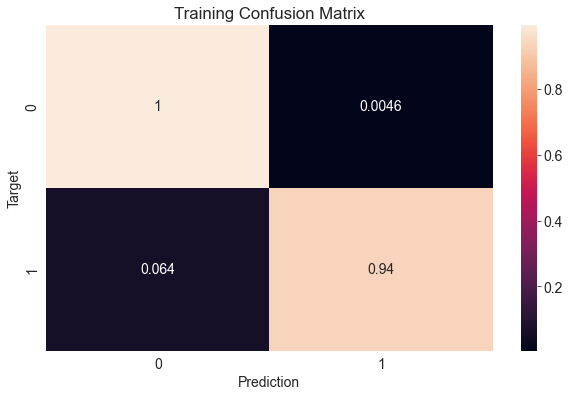

In [ ]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Let's compute the model's accuracy on the validation and test sets too.

Accuracy: 95.61%


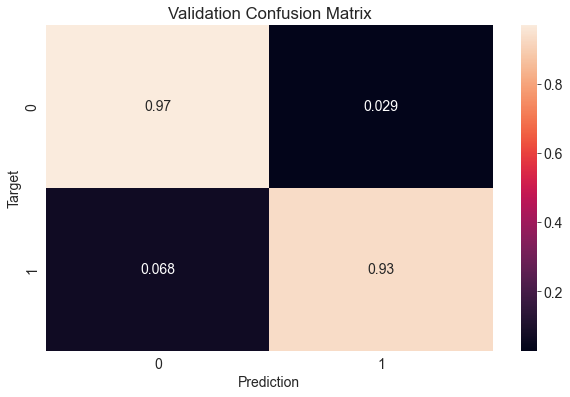

In [ ]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy: 96.49%


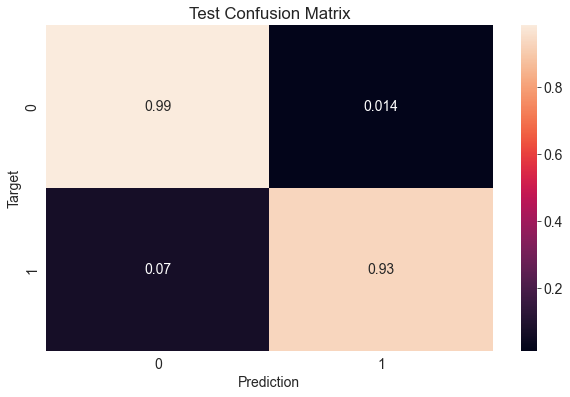

In [ ]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

The accuracy of the model on the test and validation set are above 95%, which suggests that our model generalizes well to data it hasn't seen before. 

But how good is 95% accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actually learned something useful is to compare its results to a "random" or "dumb" model.

Let's create two models: one that guesses randomly and another that always return "No". Both of these models completely ignore the inputs given to them.

In [ ]:
def random_guess(inputs):
    return np.random.choice(["B", "M"], len(inputs))

In [ ]:
def all_benign(inputs):
    return np.full(len(inputs), "B")

Let's check the accuracies of these two models on the test set.

In [ ]:
accuracy_score(test_targets, random_guess(X_test))

0.5614035087719298

In [ ]:
accuracy_score(test_targets, all_benign(X_test))

0.6228070175438597

Our random model achieves an accuracy of 52% and our "always benign" model achieves an accuracy of 62%. 

Thankfully, our model is better than a "dumb" or "random" model! This is not always the case, so it's a good practice to benchmark any model you train against such baseline models.

## Making Predictions on a Single Input

Once the model has been trained to a satisfactory accuracy, it can be used to make predictions on new data. Consider the following dictionary containing new data.

In [ ]:
new_input = {'id':1,
             'radius_mean':10, 
             'texture_mean': 10, 
             'perimeter_mean': 20, 
             'area_mean' : 34, 
             'smoothness_mean':0.1, 
             'compactness_mean':0.2, 
             'concavity_mean':0.3, 
             'concave points_mean':0.4, 
             'symmetry_mean':0.5, 
             'fractal_dimension_mean': 0.6,
             'radius_se': 0.7, 
             'texture_se': 0.9,
             'perimeter_se': 11, 
             'area_se': 200, 
             'smoothness_se': 12, 
             'compactness_se': 0.9, 
             'concavity_se': 0.87, 
             'concave points_se': 0.3, 
             'symmetry_se': 0.2, 
             'fractal_dimension_se': 0.4,
             'radius_worst': 0.6, 
             'texture_worst': 0.6,
             'perimeter_worst': 12, 
             'area_worst': 20,
             'smoothness_worst': 0.7,
             'compactness_worst': 0.3, 
             'concavity_worst': 0.2, 
             'concave points_worst': 0.1,
             'symmetry_worst': 0.17,
             'fractal_dimension_worst': 0.02}

The first step is to convert the dictionary into a Pandas dataframe, similar to `raw_df`. This can be done by passing a list containing the given dictionary to the `pd.DataFrame` constructor.

In [ ]:
new_input_df = pd.DataFrame([new_input])

In [ ]:
new_input_df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10,10,20,34,0.1,0.2,0.3,0.4,0.5,...,0.6,0.6,12,20,0.7,0.3,0.2,0.1,0.17,0.02


We've now created a Pandas dataframe with the same columns as `raw_df` (except `diagnosis`, which needs to be predicted). The dataframe contains just one row of data, containing the given input.


We must now apply the same transformations applied while training the model:

1. Scaling numerical features using the `scaler` created earlier

In [ ]:
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])

In [ ]:
X_new_input = new_input_df[numeric_cols]
X_new_input

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.142884,0.009807,-0.164398,-0.046448,0.427643,0.554015,0.702905,1.988072,1.989899,11.584667,...,-0.260761,-0.304371,-0.191294,-0.040602,4.152612,0.264585,0.159744,0.343643,0.026611,-0.229831


We can now make a prediction using `model.predict`.

In [ ]:
prediction = model.predict(X_new_input)[0]

In [ ]:
prediction

'B'

Our model predicts that it is benign! We can also check the probability of the prediction.

In [ ]:
prob = model.predict_proba(X_new_input)[0]

In [ ]:
prob

array([1.00000000e+00, 5.85797687e-79])

Our model is almost certain about its prediction

Let's define a helper function to make predictions for individual inputs.

In [ ]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    X_input = input_df[numeric_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

We can now use this function to make predictions for individual inputs.

In [ ]:
new_input = {'id':1,
             'radius_mean':10, 
             'texture_mean': 10, 
             'perimeter_mean': 20, 
             'area_mean' : 34, 
             'smoothness_mean':0.1, 
             'compactness_mean':0.2, 
             'concavity_mean':0.3, 
             'concave points_mean':0.4, 
             'symmetry_mean':0.5, 
             'fractal_dimension_mean': 0.6,
             'radius_se': 0.7, 
             'texture_se': 0.9,
             'perimeter_se': 11, 
             'area_se': 200, 
             'smoothness_se': 12, 
             'compactness_se': 0.9, 
             'concavity_se': 0.87, 
             'concave points_se': 0.3, 
             'symmetry_se': 0.2, 
             'fractal_dimension_se': 0.4,
             'radius_worst': 0.6, 
             'texture_worst': 0.6,
             'perimeter_worst': 12, 
             'area_worst': 20,
             'smoothness_worst': 0.7,
             'compactness_worst': 0.3, 
             'concavity_worst': 0.2, 
             'concave points_worst': 0.1,
             'symmetry_worst': 0.17,
             'fractal_dimension_worst': 0.02}

In [ ]:
predict_input(new_input)

('B', 1.0)

## Putting it all Together

While we've covered a lot of ground in this tutorial, the number of lines of code for processing the data and training the model is fairly small. Each step requires no more than 3-4 lines of code.

### Data Preprocessing

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Download the dataset
od.download('https://www.kaggle.com/uciml/breast-cancer-wisconsin-data')
raw_df = pd.read_csv('breast-cancer-wisconsin-data/data.csv')

# Create training, validation and test sets
train_val, test_df = train_test_split(raw_df, test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(train_val, test_size = 0.25, random_state = 42)

# Create inputs and targets
input_cols = list(train_df.columns)[2:-1]
target_col = 'diagnosis'
train_inputs, train_targets = train_df[input_cols].copy(), train_df[target_col].copy()
val_inputs, val_targets = val_df[input_cols].copy(), val_df[target_col].copy()
test_inputs, test_targets = test_df[input_cols].copy(), test_df[target_col].copy()

# Identify numeric and categorical columns
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

# Scale numeric features
scaler = MinMaxScaler().fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

# Save processed data to disk
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

# Load processed data from disk
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')
train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]


Skipping, found downloaded files in ".\breast-cancer-wisconsin-data" (use force=True to force download)


### Model Training and Evaluation


Accuracy: 95.61%
Accuracy: 96.49%


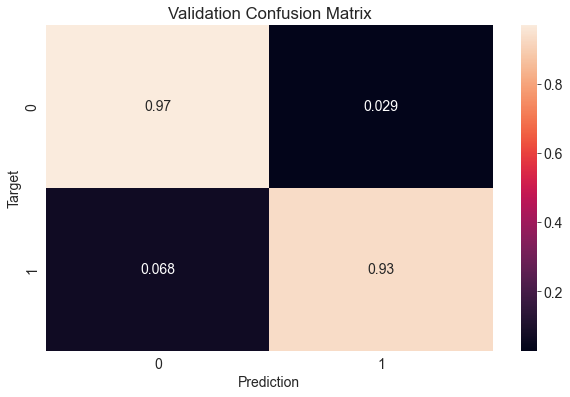

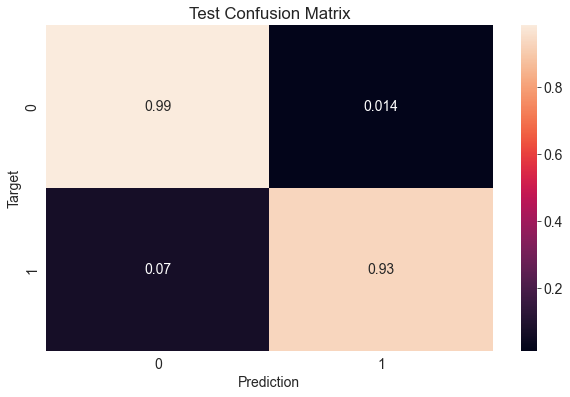

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select the columns to be used for training/prediction
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

# Create and train the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_targets)

# Generate predictions and probabilities
train_preds = model.predict(X_train)
train_probs = model.predict_proba(X_train)
accuracy_score(train_targets, train_preds)

# Helper function to predict, compute accuracy & plot confustion matrix
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

# Evaluate on validation and test set
val_preds = predict_and_plot(X_val, val_targets, 'Validation')
test_preds = predict_and_plot(X_test, test_targets, 'Test')

### Prediction on Single Inputs

In [ ]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    X_input = input_df[numeric_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

new_input = {'id':1,
             'radius_mean':10, 
             'texture_mean': 10, 
             'perimeter_mean': 20, 
             'area_mean' : 34, 
             'smoothness_mean':0.1, 
             'compactness_mean':0.2, 
             'concavity_mean':0.3, 
             'concave points_mean':0.4, 
             'symmetry_mean':0.5, 
             'fractal_dimension_mean': 0.6,
             'radius_se': 0.7, 
             'texture_se': 0.9,
             'perimeter_se': 11, 
             'area_se': 200, 
             'smoothness_se': 12, 
             'compactness_se': 0.9, 
             'concavity_se': 0.87, 
             'concave points_se': 0.3, 
             'symmetry_se': 0.2, 
             'fractal_dimension_se': 0.4,
             'radius_worst': 0.6, 
             'texture_worst': 0.6,
             'perimeter_worst': 12, 
             'area_worst': 20,
             'smoothness_worst': 0.7,
             'compactness_worst': 0.3, 
             'concavity_worst': 0.2, 
             'concave points_worst': 0.1,
             'symmetry_worst': 0.17,
             'fractal_dimension_worst': 0.02}

predict_input(new_input)

('B', 1.0)

Let's save our work using Jovian.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>